In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
df = pd.read_csv('df_with_dummies.csv')
df.head()

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,True,True,False,False,False,True,False,False,False,False
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,True,False,False,True,False,True,False,False,False,False
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,True,False,False,True,False,True,False,False,False,False
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,False,True,False,False,False,True,False,False,False,False
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,False,True,False,False,False,True,False,False,False,False


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False


In [4]:
# Coverter as colunas booleanas para float
colunas_bool = df.select_dtypes(include='bool').columns.to_list()
df = df[colunas_bool].astype(float)
df.head()

,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y,tipo_renda_Pensioner,tipo_renda_State servant,tipo_renda_Student,tipo_renda_Working,educacao_Higher education,educacao_Incomplete higher,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
# Cria variável para target e outra para os preditores
y = df['mau']
X = df.drop('mau',axis=1)

In [6]:
# Separa dados de teste e de treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=120)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [7]:
# Treina o modelo
clf = DecisionTreeClassifier(random_state=120)
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(random_state=120)

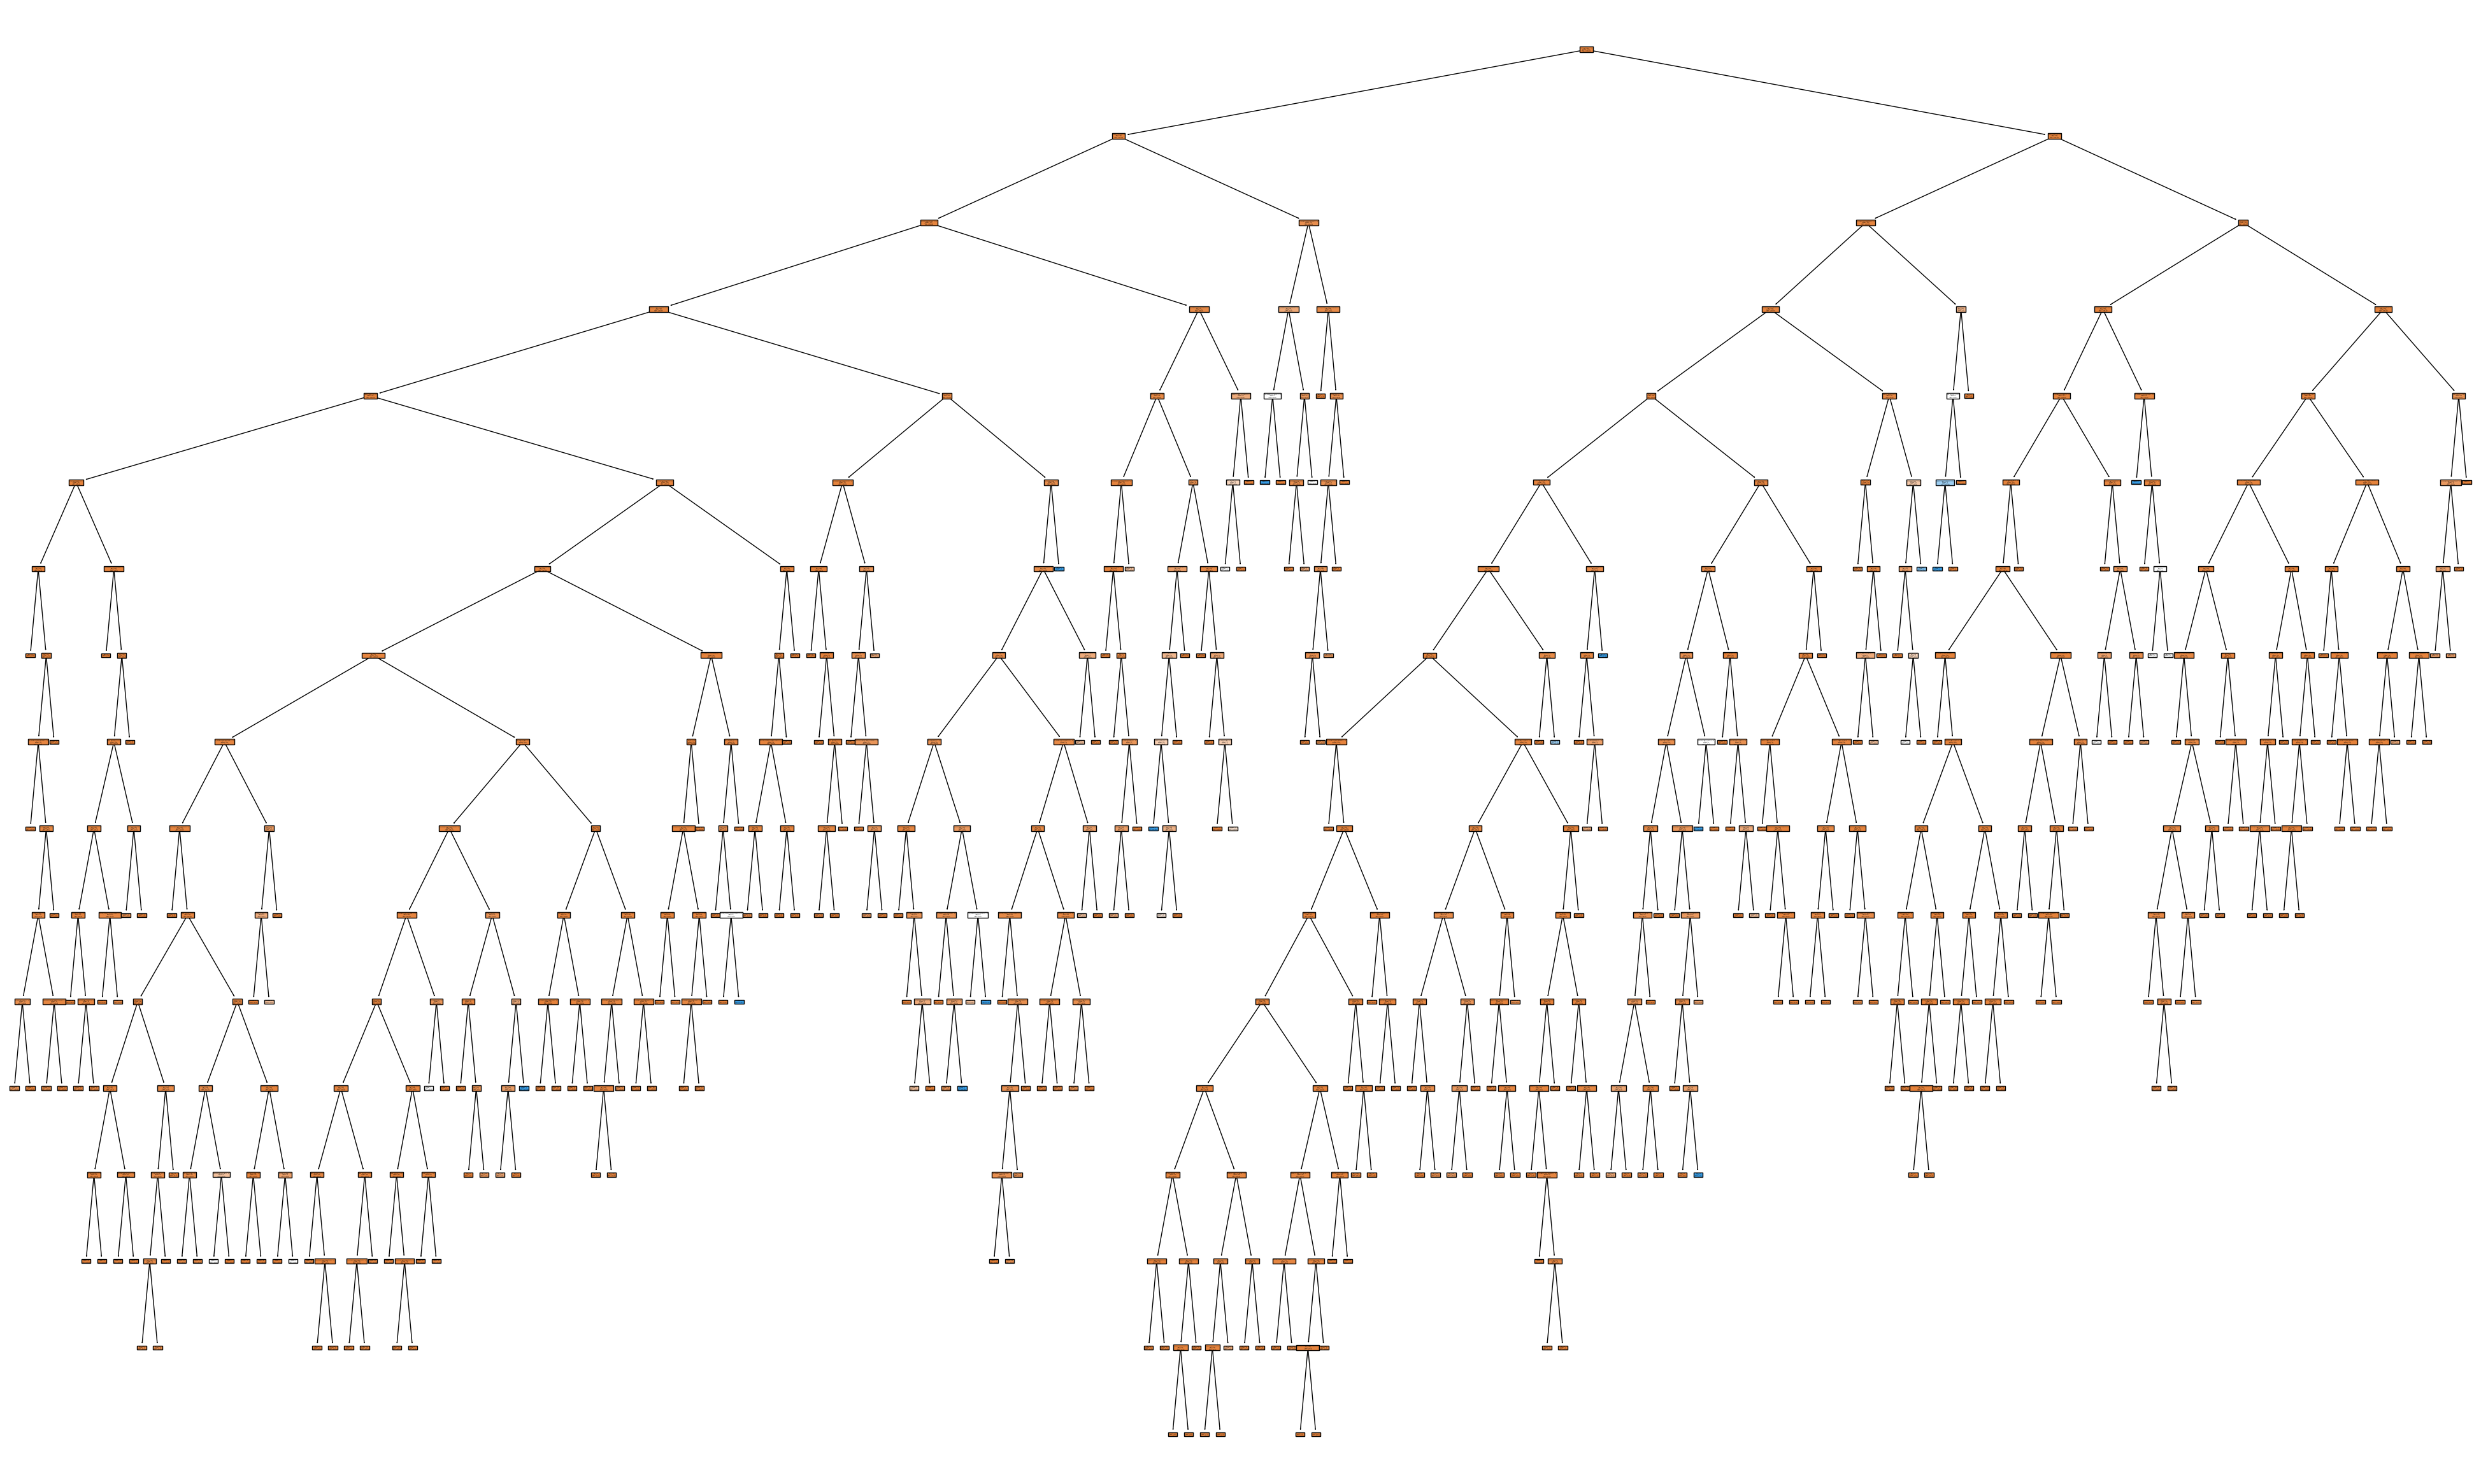

In [8]:
# Visualiza a árvore
plt.figure(figsize=(50, 30))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=list(X)
          );

# Salvando o gráfico em formato PNG
plt.savefig('grafico.png', format='png')

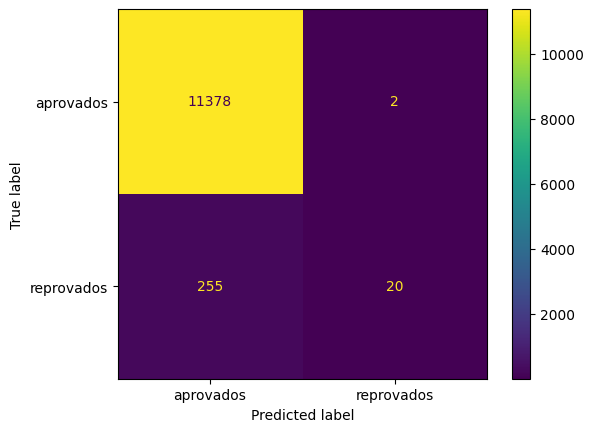

In [9]:
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, display_labels=['aprovados', 'reprovados']);

In [10]:
# previsões na base de treinamento
predict = clf.predict(X_train)

# acurácia
accuracy_score(y_train, predict)

0.977949377949378

Apesar da acurácia alta, percebemos que o modelo tende aprovar algumas pessoas que deveriam ser reprovadas. Isso deve ser causado pelo desbalanceamento do dados.

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [11]:
# previsões na base de teste
predict = clf.predict(X_test)

# acurácia
accuracy_score(y_test, predict)

0.975975975975976

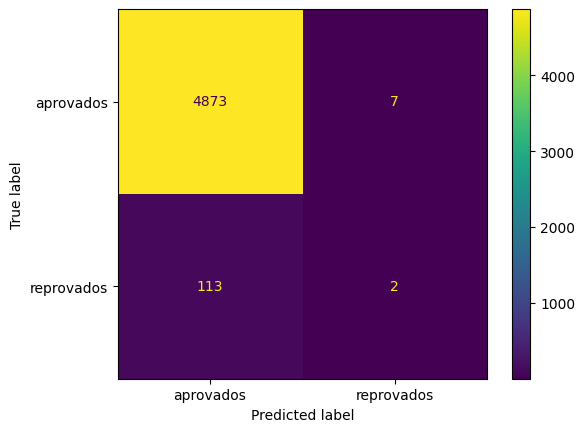

In [12]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['aprovados', 'reprovados']);

A acurácia na base treinamento e na de teste é praticamente a mesma, podendo indicar um overfitting.

In [13]:
# Árvore com o mínimo de 5 observações e o máxinmo de profundidade sendo 10
clf_prune = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_prune = clf_prune.fit(X_train, y_train)
predict = clf_prune.predict(X_test)
accuracy_score(y_test, predict)

0.9769769769769769

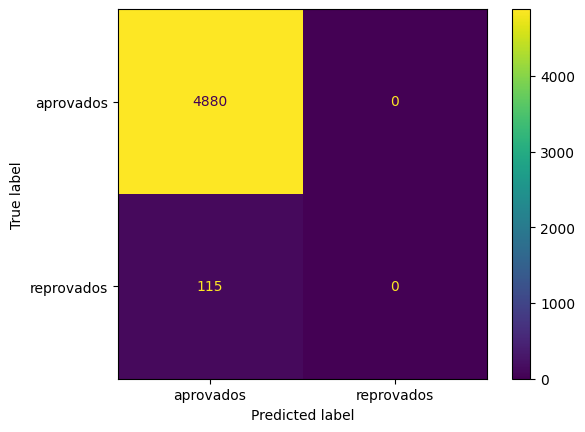

In [14]:
ConfusionMatrixDisplay.from_estimator(clf_prune, X_test, y_test, display_labels=['aprovados', 'reprovados']);

Nenhum proponente foi classificado como Mau

A acurácia se todos os contratos fossem classificados como 'bons' seria próxima de aproximadamente 98%